In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
pd.options.display.max_columns = None

## Load data

In [3]:
data = pd.read_excel('../blood-exams/covid_study_v2.xlsx')
data.insert(0,'male',(data["GENDER"] == "M").astype('int64'))
data.insert(0,'female',(data["GENDER"] == "F").astype('int64'))
data.drop(columns="GENDER", inplace=True)
data['Lymphocytes'] = pd.to_numeric(data['Lymphocytes'], errors='coerce')
data.loc[data["AGE"] < 18, "AGE"] = np.NaN
data.head()

,female,male,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH,SWAB
0,0,1,56.0,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,1
1,0,1,56.0,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,1
2,0,1,72.0,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,1
3,0,1,72.0,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,1
4,0,1,77.0,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
X, y = data[data.columns[:-1]], data["SWAB"]

## Imputation Assessment

In [23]:
imputed = pd.read_csv("metrics/imputed.csv")
imputed.head()

,Unnamed: 0,AGE,AGE.1,WBC,WBC.1,Platelets,Platelets.1,Neutrophils,Neutrophils.1,Lymphocytes,Lymphocytes.1,Monocytes,Monocytes.1,Eosinophils,Eosinophils.1,Basophils,Basophils.1,CRP,CRP.1,AST,AST.1,ALT,ALT.1,ALP,ALP.1,GGT,GGT.1,LDH,LDH.1
0,NaN,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std,mean,std
1,Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,original,61.77617328519855,17.815695199686267,8.55306859205776,4.855353347526425,226.5321299638989,101.1741776222978,6.200478468899522,4.172581031241283,1.1865384615384615,0.8064423801631618,0.6057416267942584,0.410048719243348,0.05502392344497608,0.13223712821580536,0.014423076923076924,0.039116496960338365,90.889010989011,94.42140575151268,54.20216606498195,57.612796695849184,44.91729323308271,45.5032315025435,89.89312977099236,89.08986404475988,82.4779411764706,132.70250587445392,380.4484536082474,193.98352027296716
3,1.0,61.83870967741935,17.772922369495127,8.574193548387097,4.862791554592019,226.65376344086022,100.8198641774724,6.597491039426522,4.482061866435994,1.2598566308243728,0.8987409143740496,0.6494623655913978,0.45541276776807915,0.06594982078853047,0.14723498686752898,0.01720430107526882,0.04056344860498391,92.58136200716845,96.87504900128604,54.2078853046595,57.457896460415796,47.458781362007166,49.868433953598334,82.36200716845879,66.09058633203506,79.68100358422939,119.07162781917101,379.51612903225805,199.69326908370198
4,2.0,61.831541218637994,17.767592602732545,8.556989247311828,4.8402255844657756,225.95125448028674,101.0669323249286,6.597491039426523,4.300814814772032,1.236200716845878,0.8066815690298333,0.6551971326164875,0.45837515720199107,0.05197132616487455,0.1398408109682711,0.01505376344086022,0.03871934589552013,91.24695340501793,94.97281843077457,54.26881720430107,57.421978305182535,47.40501792114696,50.648287626316595,81.80286738351255,65.19401475667733,73.4695340501792,103.19942088677071,365.7060931899642,178.11476677298714


In [29]:
# generate summary of summary table of imputed values
for var in imputed.columns[1:]:
    tmp = imputed[var][3:].astype(float)
    print("{:s}: min: {:.2f}, max: {:.2f}, mean: {:.2f}, median: {:.2f}, mode: {:.2f}".format(var, tmp.min(), tmp.max(), tmp.mean(), tmp.median(), tmp.mode()[0]))

AGE: min: 61.73, max: 61.87, mean: 61.82, median: 61.83, mode: 61.83
AGE.1: min: 17.77, max: 17.81, mean: 17.78, median: 17.77, mode: 17.77
WBC: min: 8.53, max: 8.60, mean: 8.56, median: 8.56, mode: 8.53
WBC.1: min: 4.84, max: 4.87, mean: 4.85, median: 4.84, mode: 4.84
Platelets: min: 225.95, max: 226.65, mean: 226.38, median: 226.45, mode: 225.95
Platelets.1: min: 100.82, max: 101.32, mean: 101.00, median: 100.91, mode: 100.82
Neutrophils: min: 6.59, max: 6.65, mean: 6.61, median: 6.60, mode: 6.59
Neutrophils.1: min: 4.30, max: 4.48, mean: 4.40, median: 4.41, mode: 4.30
Lymphocytes: min: 1.21, max: 1.26, mean: 1.23, median: 1.23, mode: 1.21
Lymphocytes.1: min: 0.80, max: 0.90, mean: 0.82, median: 0.81, mode: 0.80
Monocytes: min: 0.64, max: 0.66, mean: 0.65, median: 0.65, mode: 0.64
Monocytes.1: min: 0.43, max: 0.47, mean: 0.45, median: 0.46, mode: 0.43
Eosinophils: min: 0.05, max: 0.07, mean: 0.06, median: 0.05, mode: 0.05
Eosinophils.1: min: 0.12, max: 0.15, mean: 0.13, median: 0.13,

In [13]:
from sklearn.impute import MissingIndicator
indicator = MissingIndicator(features="all")
mask_all = indicator.fit_transform(X)

In [22]:
# use missing indicator to see how many negative and positive cases there are for the samples with missing values
imputed_y = y[set(X[mask_all].index)]
imputed_y.value_counts()

1    117
0     79
Name: SWAB, dtype: int64

#### Load all imputed data sets

In [5]:
# load imputed data sets
imputed_list = []
for i in range(25):
    tmp = pd.read_csv(f"imputed_sets/imputed{i}.csv")
    imputed_list.append(tmp)

Generate a table of summary statistics for the imputed data where only the imputed samples (the samples with values missing) are examined

In [6]:
from sklearn.impute import MissingIndicator
indicator = MissingIndicator(features="all")
mask_all = indicator.fit_transform(X)
def describe_only_imputed(original, imputed_sets, mask):
    """
    Creates a dataframe with mean and standard deviations (std) for the original and imputed data (only imputed samples)
    """
    # initialize dataframe
    header = ["Dataset"]
    for column in original.columns[2:]:
        for metric in ["mean", "std"]:
            header.append((column, metric))
    describe_df = pd.DataFrame(columns=header)
    # compute mean and std for original dataframe
    original = original.describe().iloc[1:3]
    tmp = ["original"]
    for column in original.columns[2:]:
        for metric in ["mean", "std"]:
            tmp.append(original.loc[metric, column])
    describe_df = describe_df.append(pd.Series(tmp, index=header), ignore_index=True)
    # compute mean and std for every imputed dataframe
    for df, idx in zip(imputed_sets, range(len(imputed_sets))):
        df = df.where(mask)
        t = df.describe().iloc[1:3]
        tmp = [int(idx+1)]
        for column in t.columns[2:]:
            for metric in ["mean", "std"]:
                tmp.append(t.loc[metric, column])
        describe_df = describe_df.append(pd.Series(tmp, index=header), ignore_index=True)
    # reorder columns for better visualization
    describe_df.set_index("Dataset", inplace=True)
    describe_df.columns = pd.MultiIndex.from_tuples(describe_df.columns)
    return describe_df

In [7]:
df_masked = describe_only_imputed(X, imputed_list ,mask_all)

In [22]:
# generate summary
for var in df_masked.columns:
    tmp = df_masked[var][1:]
    print("{:s}: min: {:.2f}, max: {:.2f}, mean: {:.2f}, median: {:.2f}, mode: {:.2f}".format(str(var), tmp.min(), tmp.max(), tmp.mean(), tmp.median(), tmp.mode()[0]))

('AGE', 'mean'): min: 55.00, max: 75.00, mean: 67.90, median: 69.50, mode: 69.50
('AGE', 'std'): min: 6.36, max: 20.51, mean: 10.04, median: 7.78, mode: 6.36
('WBC', 'mean'): min: 5.90, max: 15.15, mean: 10.14, median: 9.10, mode: 5.90
('WBC', 'std'): min: 0.57, max: 7.07, mean: 2.46, median: 1.48, mode: 0.57
('Platelets', 'mean'): min: 145.50, max: 243.50, mean: 205.60, median: 214.50, mode: 145.50
('Platelets', 'std'): min: 2.12, max: 169.00, mean: 66.75, median: 50.20, mode: 2.12
('Neutrophils', 'mean'): min: 7.76, max: 7.99, mean: 7.84, median: 7.78, mode: 7.78
('Neutrophils', 'std'): min: 4.49, max: 5.15, mean: 4.83, median: 4.91, mode: 4.49
('Lymphocytes', 'mean'): min: 1.27, max: 1.47, mean: 1.36, median: 1.35, mode: 1.27
('Lymphocytes', 'std'): min: 0.78, max: 1.11, mean: 0.85, median: 0.80, mode: 0.78
('Monocytes', 'mean'): min: 0.75, max: 0.82, mean: 0.78, median: 0.78, mode: 0.75
('Monocytes', 'std'): min: 0.47, max: 0.60, mean: 0.54, median: 0.55, mode: 0.47
('Eosinophils',

In [10]:
df_masked.to_latex(buf="metrics/masked_imputed.tex", float_format="%.3f", index=True)

Compute Mann-Whitney U test for each variable in each imputed data set. The Mann-Whitney U test compares two variables and determines if they come from the same distribution.

In [11]:
from scipy.stats import mannwhitneyu
def u_test_df(original, imputed_sets):
    """
    Creates a dataframe with mean and standard deviations (std) for the original and imputed data
    """
    # initialize dataframe
    header = ["Dataset"]
    for column in original.columns[2:]:
        for metric in ["test value", "p-value"]:
            header.append((column, metric))
    describe_df = pd.DataFrame(columns=header)
    # compute Mann-Whitney U test for imputed sets 
    for df, idx in zip(imputed_sets, range(len(imputed_sets))):
        tmp = [int(idx+1)]
        for column in df.columns[2:]:
            values = mannwhitneyu(original[column], df[column])
            for i,metric in enumerate(["test value", "p-value"]):
                tmp.append(values[i])
        describe_df = describe_df.append(pd.Series(tmp, index=header), ignore_index=True)
    # reorder columns for better visualization
    describe_df.set_index("Dataset", inplace=True)
    describe_df.columns = pd.MultiIndex.from_tuples(describe_df.columns)
    return describe_df

In [12]:
df_u = u_test_df(X, imputed_list)

In [13]:
#export dataframe
df_u.to_latex(buf="metrics/u_imputed.tex", float_format="%.3f", index=True)

In [14]:
# make p-value more apparent by using boolean indexing; true means p-value is below 0.05 meaning H0 can be refuted (different distributions)
idx = pd.IndexSlice
df_u.loc[idx[:], idx[:, 'p-value']] < 0.05

,AGE,WBC,Platelets,Neutrophils,Lymphocytes,Monocytes,Eosinophils,Basophils,CRP,AST,ALT,ALP,GGT,LDH
,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value,p-value
Dataset,,,,,,,,,,,,,,
1.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
2.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
3.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
4.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
5.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
6.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
7.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True
8.0,False,False,False,True,True,True,True,True,False,False,False,True,True,True


### Plot original vs imputed sets

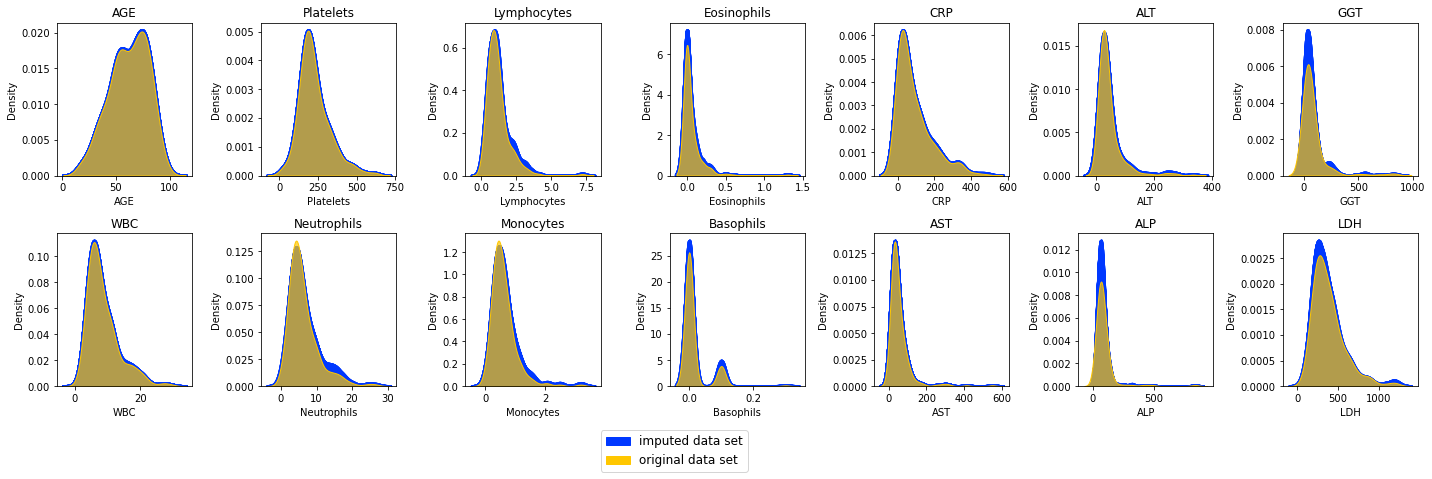

In [10]:
# kernel density plots comparing the original and imputed sets (all samples)
import matplotlib.patches as mpatches
blue_patch = mpatches.Patch(color='#0038FF', label='imputed data set')
yellow_patch = mpatches.Patch(color='#FFC700', label='original data set')
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    for ds in imputed_list:
        sns.kdeplot(ds[ds.columns[x]], ax=axes[i,j], color="#0038FF", fill=True, alpha=.5, linewidth=3)
    sns.kdeplot(X[X.columns[x]], ax=axes[i,j], color="#FFC700", fill=True, alpha=.7)
    axes[i,j].set_title(X.columns[x])
plt.tight_layout()
plt.legend(handles=[blue_patch, yellow_patch], loc="lower center",bbox_to_anchor=(-4.5,-0.6), fontsize="large")
fig.savefig('figures/imputed.png', bbox_inches='tight')

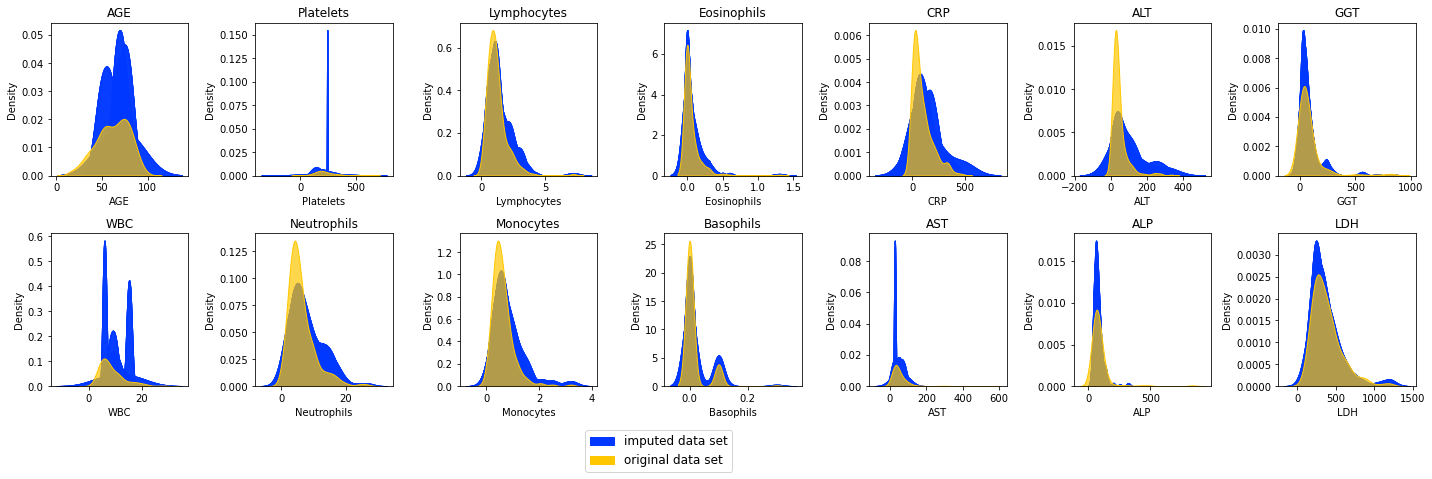

In [6]:
# kernel density plots comparing the original and imputed sets (imputed samples only)
from sklearn.impute import MissingIndicator
import matplotlib.patches as mpatches
indicator = MissingIndicator(features="all")
mask_all = indicator.fit_transform(X)
blue_patch = mpatches.Patch(color='#0038FF', label='imputed data set')
yellow_patch = mpatches.Patch(color='#FFC700', label='original data set')
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(20,6))
for x in range(2,16):
    i = x % 2
    j = x // 2 - 1
    for ds in imputed_list:
        ds = ds.where(mask_all)
        sns.kdeplot(ds[ds.columns[x]], ax=axes[i,j], color="#0038FF", fill=True, alpha=.5)
    sns.kdeplot(X[X.columns[x]], ax=axes[i,j], color="#FFC700", fill=True, alpha=.7)
    axes[i,j].set_title(X.columns[x])
plt.tight_layout()
plt.legend(handles=[blue_patch, yellow_patch], loc="lower center",bbox_to_anchor=(-4.5,-0.6), fontsize="large")
fig.savefig("figures/imputed_only.png", bbox_inches='tight')